<a href="https://colab.research.google.com/github/SumeyyeBulutt/makineOgrenmesiFinal/blob/main/makineogrenmesifinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAKİNE ÖĞRENMESİ DERSİ FİNAL ÖDEVİ
ÖĞRENCİ: SÜMEYYE BULUT
ÖĞRENCİ NO: 20040301011
BÖLÜM: YAZILIM MÜHENDİSLİĞİ

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


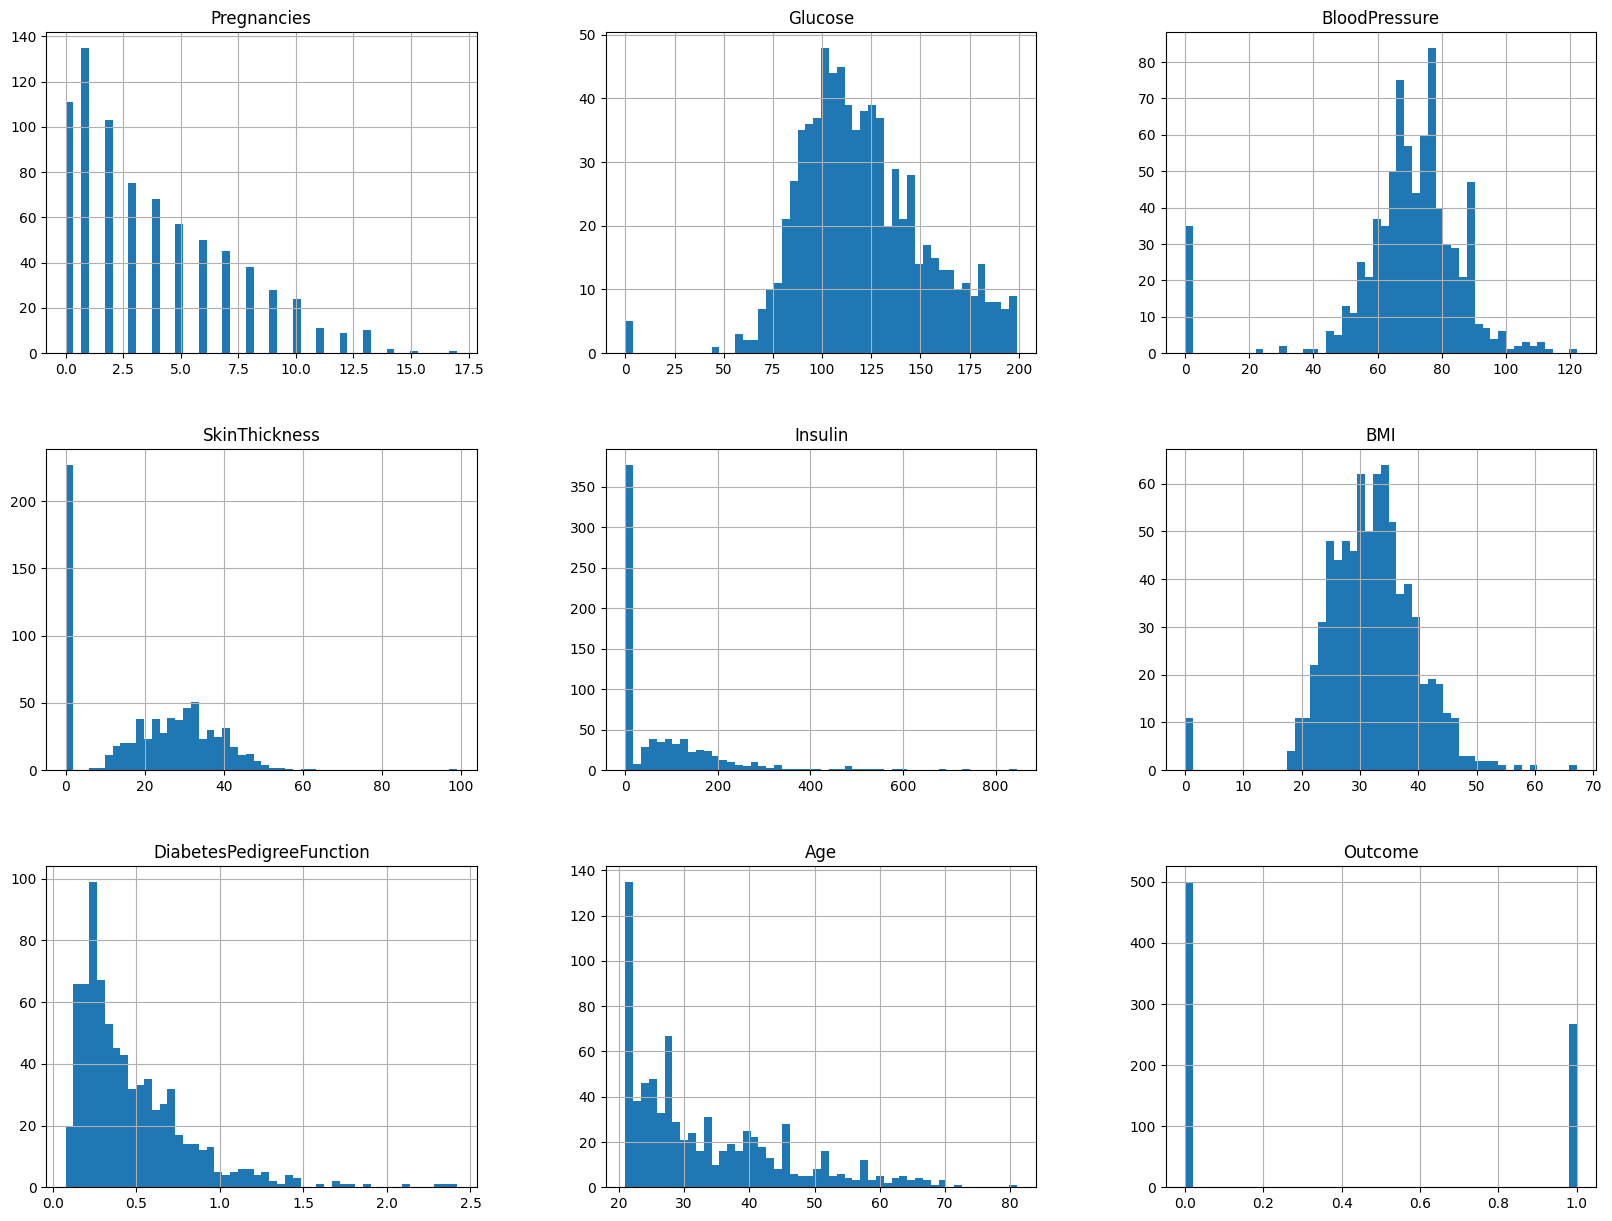

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def evaluate_model(y_test, y_pred, y_prob):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


Cross-Validation Accuracy Scores: [0.81481481 0.81481481 0.77777778 0.7037037  0.72222222 0.85185185
 0.72222222 0.67924528 0.79245283 0.69811321]
Mean Cross-Validation Accuracy: 0.7577218728162125
Naive Bayes Results:
Confusion Matrix:
[[119  32]
 [ 27  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Sensitivity: 0.6625
Specificity: 0.7880794701986755
Accuracy: 0.7445887445887446
F1 Score: 0.6424242424242423
AUC: 0.7904801324503311


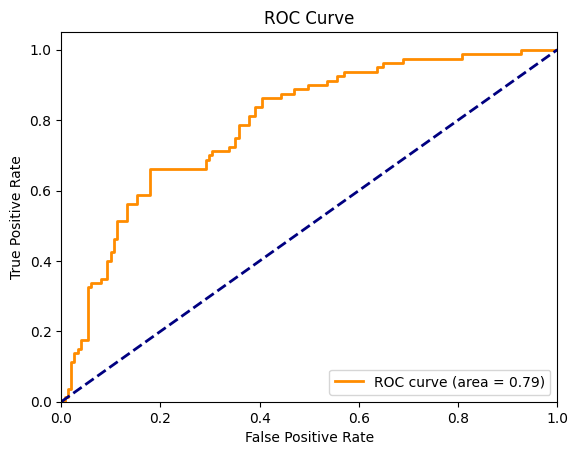

In [ ]:
#Naive Bayes modeli oluşturma ve eğitme
nb_model = GaussianNB()

cv_scores = cross_val_score(nb_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

#Sonuçlar
print("Naive Bayes Results:")
evaluate_model(y_test, y_pred, y_prob)

En iyi parametreler: {'var_smoothing': 4.328761281083053e-06}
Naive Bayes Results with Optimization:
Confusion Matrix:
[[118  33]
 [ 28  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

Sensitivity: 0.65
Specificity: 0.7814569536423841
Accuracy: 0.7359307359307359
F1 Score: 0.6303030303030304
AUC: 0.7859271523178808


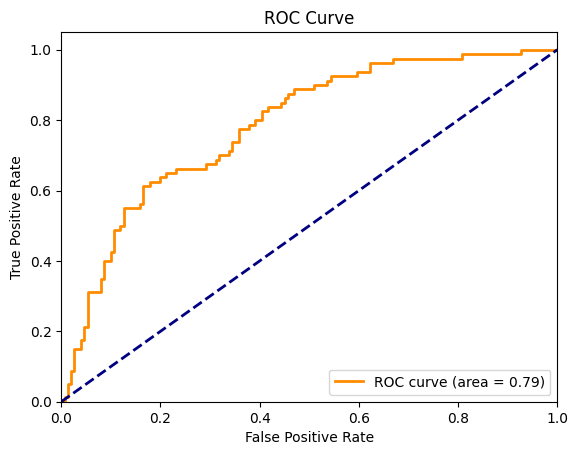

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Hiperparametre optimizasyonu
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#Naive Bayes modeli oluşturma ve eğitme
nb_model = GaussianNB()

#GridSearchCV
grid_search = GridSearchCV(nb_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_nb_model = GaussianNB(**best_params)
best_nb_model.fit(X_train, y_train)

y_pred = best_nb_model.predict(X_test)
y_prob = best_nb_model.predict_proba(X_test)[:, 1]

#Sonuçlar
print("Naive Bayes Results with Optimization:")
evaluate_model(y_test, y_pred, y_prob)


En iyi parametreler var_smoothing: 4.328761281083053e-06 olarak bulunmuştur. Bu parametre, Naive Bayes modelinde kullanılan varyans düzeltme parametresidir. Varyans düzeltme, eğitim veri setinde gözlemlenen her özelliğin varyansını belirli bir sabitle küçültmeye yarar. Bu, modelin daha dengeli ve daha iyi genelleştirilmiş sonuçlar üretmesine yardımcı olabilir.

True Negative (TN)(118): Model 118 negatif örneği doğru bir şekilde negatif olarak sınıflandırdı. False Positive (FP)(33): Model 33 negatif örneği yanlış bir şekilde pozitif olarak sınıflandırdı. False Negative (FN)(28): Model 28 pozitif örneği yanlış bir şekilde negatif olarak sınıflandırdı. True Positive (TP)(52): Model 52 pozitif örneği doğru bir şekilde pozitif olarak sınıflandırdı.

Precision(kesinlik): Bir sınıfın pozitif olarak tahmin edildiğinde gerçekten pozitif olma oranını ölçer. Sınıf 0 için 0.81, sınıf 1 için 0.61 olarak bulunmuştur. Yani modelin pozitif sınıflandırmalarının güvenilirliğinin daha düşük olduğunu bize gösteriyor.

Recall: Gerçek pozitif örneklerin ne kadarının doğru olarak tahmin edildiğini ölçer. Sınıf 0 için 0.78 , sınıf 1 için 0.65 olarak bulunmuştur.

Macro Average: Sınıflar arasındaki ortalama değeri gösterir.

Weighted Average: Sınıfların destek oranlarına göre ağırlıklı ortalama değeri gösterir.

Sensitivity: Pozitif sınıflandırmaların doğru olarak tahmi edilme oranıdır.
TP/(TP+FN) = 52/(52+28) = 0.65
0.65 değeri, modelin pozitif örneklerin %65’ inin doğru bir şekilde pozitif olarak sınıflandırabildiğini gösteriyor. Yani modelin pozitif sınıfları tespit etme yeteneğini bize gösteriyor.

Specificity: Negatif sınıflandırmaların doğru olarak tahmin edilme oranıdır.
TN/(TN+FP) = 118/(118+33) = 0.78
0.78 değeri, modelin negatif örneklerin %78’ inin doğru bir şekilde negatif olarak sınıflandırabildiğini gösteriyor. Yani modelin negatif sınıfları doğru bir şekilde tespit etme yeteneğini bize gösteriyor.

Accuracy: Modelin doğru tahminlerinin toplam tahminlere oranıdır.
(TN+TP)/(TN+FP+FN+TP) = (118+52)/(118+33+28+52) = 0.7359
Modelimiz test setindeki örneklerin %73 ünü doğru olarak sınıflandırmıştır. Ancak accuracy değerinin yüksek olması her zaman modelin iyi olduğu anlamına gelmez. Diğer metriklerle birlikte değerlendirilmelidir.

F1-Score: Precision ve recall değerlerinin harmonik ortalamasıdır. Sınıf 0 için 0.79 , sınıf 1 için 0.63 olarak bulunmuştur. Modelin precision ve recall arasındaki denge kurma yeteneğini bize gösterir. Pozitif sınıf için 0.63 değeri, modelin bu sınıftaki performansının mükemmel olmadığını ancak kabul edilebilir bir seviyede olduğunu gösteriyor.

ROC eğrisi, farklı eşik değerlerinde true positive rate (TPR) ve false positive rate (FPR) arasındaki ilişkiyi gösterir. AUC(Area Under Curve), modelin genel performansını gösterir. 1'e ne kadar yakınsa model o kadar iyi demektir. AUC değerinin 0.7859 olması bize modelin genel olarak pozitif ve negatif sınıfları ayırt etme yeteneğinin iyi olduğunu gösteriyor.

Bu sonuçlar bize Naive Bayes modelinin veri setinde kabul edilebilir bir performans sergilediğini ancak özellikle pozitif sınıflandırmalarda bazı iyileştirmeler yapılması gerektiğini gösteriyor. Pozitif örneklerdeki yanlış negatif oranı, modelin duyarlılığını artırmak için daha fazla optimize edilmesi gerektiğini gösteriyor. Bu bize veri setindeki dengesizliklerin ve modelin sınıflandırma yeteneklerinin iyileştirilmesi gerektiğini anlatıyor.

Naive Bayes modelleri genellikle parametre optimizasyonuna ihtiyaç duymazlar. Bunun nedeni, Naive Bayes algoritmasının basitliği ve varsayımlarının doğası gereği, çok fazla hiperparametreye sahip olmamasıdır. Naive Bayes modeli için yapılabilecek optimizasyonlar sınırlı olduğundan, cross-validation kullanarak modelin performansını değerlendirmeniz zaten modelin yeterince optimize edildiğini ve genelleme yeteneğini gösterir. Ancak, daha karmaşık modellerde (SVM, MLP, KNN) hiperparametre optimizasyonu yapmak gereklidir. Ama biz fark var mı diye görmek için ikisini de denedik. Modelimize bir yerde Cross-Validation diğer yerde Hiperparametre Optimizasyonu yaptık. Aldığımız sonuçlarda pek bir fark göremedik ama yine de modelin daha iyi genelleme yapıp daha dengeli sonuçlar vermesi için optimizasyon yapıp optimizasyon yapılmış modelin sonuçlarını raporlamanın daha doğru olduğuna karar verdik.


En iyi k değeri: 28
KNN Results:
Confusion Matrix:
[[133  18]
 [ 44  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       151
           1       0.67      0.45      0.54        80

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.67       231
weighted avg       0.72      0.73      0.72       231

Sensitivity: 0.45
Specificity: 0.8807947019867549
Accuracy: 0.7316017316017316
F1 Score: 0.5373134328358209
AUC: 0.7372516556291391


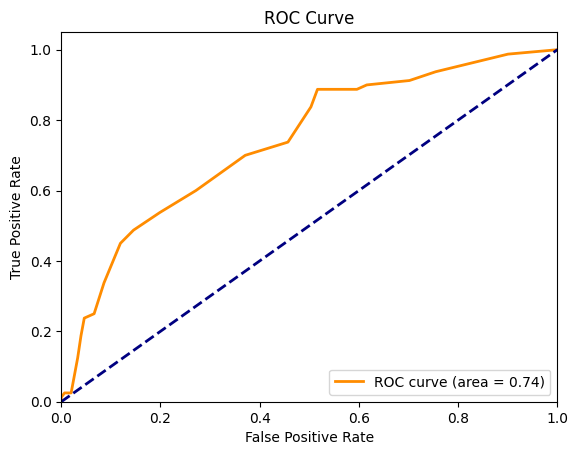

In [ ]:
#KNN modeli oluşturma ve eğitme
#Hiperparametre optimizasyonu RandomizedSearchCV
param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_k = random_search.best_params_['n_neighbors']
print(f"En iyi k değeri: {best_k}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

#Sonuçlar
print("KNN Results:")
evaluate_model(y_test, y_pred, y_prob)

True Negative (TN)(133): Model 133 negatif örneği doğru bir şekilde negatif olarak sınıflandırdı.
False Positive (FP)(18): Model 18 negatif örneği yanlış bir şekilde pozitif olarak sınıflandırdı.
False Negative (FN)(44): Model 44 pozitif örneği yanlış bir şekilde negatif olarak sınıflandırdı.
True Positive (TP)(36): Model 36 pozitif örneği doğru bir şekilde pozitif olarak sınıflandırdı.

Buradaki 'k' değeri K-Nearest Neighbors algoritmamızda kullandığımız ve modelin tahmin yaparken dikkate aldığı en yakın komşu sayısını ifade ediyor. KNN algoritmasında optimal k değerini bulmak için cross-validation yöntemini kullanıyoruz. Farklı k değerleri deneniyor ve her birinin performansı değerlendiriliyor. En iyi performansı veren k değeri seçiliyor.Bu bize modelin en yakın 28 komşusunu dikkate alarak bir veri noktasının sınıfını tahmin ettiğini gösteriyor.

Precision: Bir sınıfın pozitif olarak tahmin edildiğinde gerçekten pozitif olma oranını ölçer.
Sınıf 0 için 133/(133+18) = 0.88 , sınıf 1 için 36/(36+44) = 0.45 olarak bulunmuştur. Modelin negatif sınıf tahminlerinin %88'i doğru,  modelin pozitif sınıf tahminlerinin ise %45'i doğrudur. Pozitif sınıfta precision değeri düşüktür, bu da modelin birçok yanlış pozitif tahmin yaptığını bize gösterir.

Recall: Gerçek pozitif örneklerin ne kadarının doğru olarak tahmin edildiğini ölçer. Sınıf 0 için 133/(133+18) = 0.88 ,
sınıf 1 için 36/(36+44) = 0.45 olarak bulunmuştur. Negatif sınıfın %88'i doğru olarak negatif tahmin edilmiştir. Pozitif sınıfın %45'i doğru olarak pozitif tahmin edilmiştir yani pozitif sınıf için recall değeri düşüktür bu da modelin birçok pozitif örneği kaçırdığını bize gösteriyor.

Macro Average: Sınıflar arasındaki ortalama değeri gösterir.

Weighted Average: Sınıfların destek oranlarına göre ağırlıklı ortalama değeri gösterir.

Sensitivity: Pozitif sınıflandırmaların doğru olarak tahmin edilme oranıdır. TP/(TP+FN) = 36/(36+44) = 0.45

Specificity: Negatif sınıflandırmaların doğru olarak tahmin edilme oranıdır. TN/(TN+FP) = 133/(133+18) = 0.88
Negatif sınıflandırmaların %88 i doğru olarak tespit edilmiştir. Bu bize modelin negatif sınıfları doğru tespit etme yeteneğinin yüksek olduğunu gösteriyor.

Accuracy: Modelin doğru tahminlerinin toplam tahminlere oranıdır. (133+36)/(133+18+44+36) = 0.73.
Modelin accuracy değeri yani doğruluğu %73.16 dır. Yani model test setindeki 231 örneğin %73.16 sını doğru olarak sınıflandırmıştır. Bu bize modelin genel performansı hakkında bir fikir verir ama yinede diğer metriklere de bakılmalıdır.

F1-Score: Precision ve recall  değerlerinin harmonik ortalamasıdır.
F1-Score değeri negatif sınıf için 0.81 dir. Bu da bize precision ve recall arasında dengeli bir performans olduğunu gösteriyor.
F1-Score değeri pozitif sınıf için 0.54 dür. Bu da bize bu sınıf için modelin performansının mükemmel olmadığını ancak kabul edilebilir olduğunu gösteriyor.

ROC (Receiver Operating Characteristic) eğrisi, farklı eşik değerlerinde true positive rate (TPR) ve false positive rate (FPR) arasındaki ilişkiyi gösterir.
AUC (Area Under Curve) yani eğri altındaki alan, modelin genel performansını gösterir. 1'e ne kadar yakınsa model o kadar iyidir. AUC değeri 0.7373, modelin genel olarak pozitif ve negatif sayıları ayırt etme yeteneğinin iyi olduğunu gösteriyor. AUC'nin 1'e yakın olması modelin daha iyi performans gösterdiğini belirtir.

K-Nearest Neighbors (KNN) modelimiz, en iyi k değeri olan 28 ile %73 doğruluk oranına sahiptir. Model, negatif sınıf için yüksek bir performans sergilemektedir, ancak pozitif sınıf için performans düşüktür. Bu durum, modelin pozitif örnekleri tespit etmede zorlandığını ve pozitif sınıf tahminlerinde güvenilirliğinin düşük olduğunu bize gösterir. Bu bize veri setindeki dengesizliklerin ve modelin sınıflandırma yeteneklerinin iyileştirilmesi gerektiğini anlatıyor.

En iyi parametreler: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.05, 'activation': 'relu'}
MLP Results:
Confusion Matrix:
[[128  23]
 [ 42  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       151
           1       0.62      0.47      0.54        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

Sensitivity: 0.475
Specificity: 0.847682119205298
Accuracy: 0.7186147186147186
F1 Score: 0.5390070921985816
AUC: 0.7102649006622518


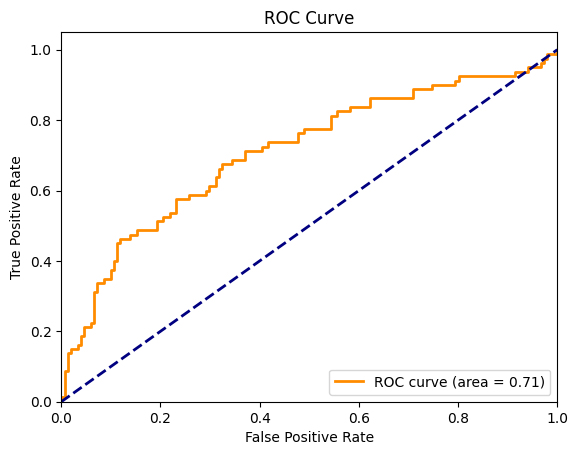

In [ ]:
#MLP modeli oluşturma ve eğitme
#Hiperparametre optimizasyonu RandomizedSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=500, random_state=42)
random_search = RandomizedSearchCV(mlp, param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"En iyi parametreler: {best_params}")

mlp_model = MLPClassifier(**best_params, max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

#Sonuçlar
print("MLP Results:")
evaluate_model(y_test, y_pred_mlp, y_prob_mlp)

MLP (Multi-Layer Perceptron) modelinde kullanılan en iyi parametreleri RandomizedSearchCV kullanarak belirledik. Bunlar
solver:adam , learning_rate:adaptive , hidden_layer_sizes:(50, 100, 50) , alpha: 0.05 , activation: relu 'dur. Bu parametreler modelimizin eğitim performansını optimize etmek için seçilmiştir.

True Negative (TN)(128): Model 128 negatif örneği doğru bir şekilde negatif olarak sınıflandırdı.
False Positive (FP)(23): Model 23 negatif örneği yanlış bir şekilde pozitif olarak sınıflandırdı.
False Negative (FN)(42): Model 42 pozitif örneği yanlış bir şekilde negatif olarak sınıflandırdı.
True Positive (TP)(38): Model 38 pozitif örneği doğru bir şekilde pozitif olarak sınıflandırdı.

Precision: Belirli bir sınıf içinde yapılan pozitif tahminlerin ne kadarının doğru olduğunu bize gösterir. Negatif sınıf için 0.75 olarak bulunmuştur. Yani modelin negatif sınıf tahminlerinin %75 i doğrudur. Pozitif sınıf için 0.62 olarak bulunmuştur. Yani modelin pozitif sınıf tahminlerinin %62 sinin doğru olduğunu bize gösteriyor ve bu da modelin birçok yanlış pozitif tahmin yaptığını gösteriyor.

Recall: Belirli bir sınıftaki gerçek pozitif örneklerin ne kadarının doğru tahmin edildiğini bize gösterir. Negatif sınıf için 0.85 olarak bulunmuştur yani negatif sınıf örneklerinin %85 i doğru tahmin edilmiştir. Pozitif sınıf için ise 0.47 olarak bulunmuştur bu da bize pozitif sınıf örneklerinin %47 sinin doğru tahmin edildiğini ve modelin birçok pozitif örneği kaçırdığını gösteriyor.

Macro Average: Sınıflar arasındaki ortalama değeri gösterir.

Weighted Average: Sınıfların destek oranlarına göre ağırlıklı ortalama değeri gösterir.

Sensitivity: Pozitif sınıflandırmaların doğru olarak tahmin edilme oranıdır. TP/(TP+FN) = 38/(38+42) = 0.475

Specificity: Negatif sınıfların doğru olarak tahmin edilme oranını gösterir. Negatif sınıflandırmaların %84.77 si doğru olarak tespit edilmiştir. Bu bize modelin negatif sınıfları doğru tespit etme yeteneğinin yüksek olduğunu gösterir.

Accuracy: Modelin genel performansını bize gösterir ve test setindeki 231 örneğin %71.86 sını doğru olarak sınıflandırdığını belirtir. Yani 231 örnekten 166 tanesi doğru sınıflandırılmıştır.

F1-Score: Precision ve recall'un harmonik ortalamasıdır, dengesiz veri setlerinde işe yarar. Negatif sınıf için 0.80 olarak bulunmuştur. Bu yüksek F1-Score, modelin negatif sınıfı iyi bir şekilde tespit ettiğini ve hem kesinlik(precision) hem de duyarlılık(recall) metriklerinde dengeli bir performans gösterdiğini belirtir. Pozitif sınıf için 0.54 olarak bulunmuştur. Bu daha düşük F1-Score, modelin pozitif sınıfı tespit etmede zorlandığını ve hem kesinlik hem de duyarlılık metriklerinde düşük performans gösterdiğini belirtir.

ROC (Receiver Operating Characteristic) eğrisi, farklı eşik değerlerinde true positive rate (TPR) ve false positive rate (FPR) arasındaki ilişkiyi gösterir.
AUC (Area Under Curve): ROC'un altında kalan olan olan AUC, modelin genel olarak pozitif ve negatif sınıfları ayırt etme yeteneğini gösterir. AUC değeri 0.7103, modelin bu konuda kabul edilebilir bir performansa sahip olduğunu gösterir. AUC'nin 1'e yakın olması, modelin daha iyi performans gösterdiğini belirtir.

Yani özetle;
En iyi hiperparametreler RandomizedSearchCV kullanarak belirlendi.
%71.86'lık accuracy(doğruluk) oranı modelin genel performansını bize gösteriyor.
Precision,Recall,F1-Score; negatif sınıf için yüksek performans, pozitif sınıf için ise düşük performans gösteriyor. Bu bize modelin pozitif örnekleri tespit etmede zorlandığını ve pozitif sınıf tahminlerinde güvenilirliğin düşük olduğunu gösteriyor.
Specificity, modelin negatif sınıflandırmalarda yüksek bir özgüllüğe sahip olduğunu gösteriyor.
AUC, 0.7103 değeri modelin genel performansını gösterir, pozitif ve negatif sınıfları ayırt etme yeteneğinin makul olduğunu bize belirtiyor.
Bunlardan hareketle modelin pozitif sınıfı(class 1) daha iyi tahmin edebilmesi için ek iyileştirmelere ihtiyaç olduğunu anlıyoruz.

En iyi parametreler: {'kernel': 'linear', 'gamma': 0.001, 'C': 1}
SVM Results:
Confusion Matrix:
[[122  29]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

Sensitivity: 0.625
Specificity: 0.8079470198675497
Accuracy: 0.7445887445887446
F1 Score: 0.6289308176100629
AUC: 0.8024834437086092


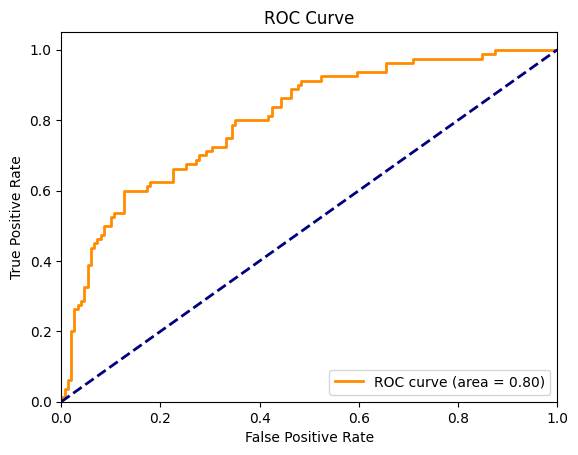

In [ ]:
#SVM modeli oluşturma ve eğitme
#Hiperparametre optimizasyonu RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
svm = SVC(probability=True, random_state=42)
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"En iyi parametreler: {best_params}")

svm_model = SVC(**best_params, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

#Sonuçlar
print("SVM Results:")
evaluate_model(y_test, y_pred_svm, y_prob_svm)

SVM (Support Vector Machine) modelinde kullanılan en iyi parametreleri GridSearchCV kullanarak belirledik. Bunlar Kernel:linear , Gamma:0.001 , C:1 'dir. Bu parametreler modelimizin eğitim performansını optimize etmek için seçilmiştir. SVM'de kernel fonksiyonu, veri noktalarının yüksek boyutlu bir uzaya dönüştürülmesini sağlar. 'linear' kernel, verilerin doğrusal olarak ayrılabileceği anlamına gelir. C parametresi, hataları tolere etme düzeyini belirlerken, gamma parametresi, modelin ne kadar karmaşık olacağını belirler.

True Negative (TN)(122): Model 122 negatif örneği doğru bir şekilde negatif olarak sınıflandırdı.
False Positive (FP)(29): Model 29 negatif örneği yanlış bir şekilde pozitif olarak sınıflandırdı.
False Negative (FN)(30): Model 30 pozitif örneği yanlış bir şekilde negatif olarak sınıflandırdı.
True Positive (TP)(50): Model 50 pozitif örneği doğru bir şekilde pozitif olarak sınıflandırdı.

Precision: Modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu bize gösterir. Negatif sınıf için 0.80 olarak bulunmuştur bu da bize negatif olarak tahmin edilenlerin %80 inin gerçekten negatif olduğunu gösterir. Pozitif sınıf için 0.63 olarak bulunmuştur ve bu da bize pozitif olarak tahmin edilenlerin %63 ünün gerçekten pozitif olduğunu gösterir.

Recall: Modelin gerçek pozitif örnekleri ne kadar iyi tespit ettiğini gösterir. Negatif sınıf için 0.81 olarak bulunmuştur bu da bize negatif örneklerin %81 inin doğru tahmin edildiğini anlatıyor. Pozitif sınıf için 0.62 olarak bulunmuştur bu da bize pozitif örneklerin %62 sinin doğru olarak tahmin edildiğini gösteriyor.

Macro Average: Sınıflar arasındaki ortalama değeri gösterir.
Precision: 0.72
Recall: 0.72
F1-Score: 0.72

Weighted Average: Sınıfların destek oranlarına göre ağırlıklı ortalama değeri gösterir.
Precision: 0.74
Recall: 0.74
F1-Score: 0.74

Sensitivity: Pozitif sınıflandırmaların doğru olarak tahmin edilme oranıdır. TP/(TP+FN) = 50/(50+30) = 0.625 yani model pozitif sınıfın %62.5 ini doğru tahmin etmiştir.

Specificity: Modelin negatif örnekleri ne kadar iyi tespit ettiğini bize gösterir yani negatif sınıfların doğr olarak tahmin edilme oranıdır. Negatif sınıflandırmaların %80.79 unu doğru tahmin etmiştir. Bu bize modelin negatif sınıfları doğru tespit etme yeteneğinin yüksek olduğunu gösterir.

Accuracy: Modelin doğru tahminlerinin toplam tahminlere oranıdır. Modelimiz tüm örneklerin %74.46 sını doğru tahmin etmiştir. Accuracy modelin genel performansını gösterir ancak dengesiz veri setlerinde yanıltıcı olabileceği için diğer metriklerle değerlendirilmelidir.

F1-Score: Precision ve recall'un harmonik ortalamasıdır. Sınıf 0 için 0.81' dir yani negatif sınıf için yüksek bir denge sağlar. Sınıf 1 için 0.63'tür yani pozitif sınıf için daha düşük ama yinede dengeli bir performans gösterdiğini anlamış oluyoruz.

ROC (Receiver Operating Characteristic) eğrisi, farklı eşik değerlerinde true positive rate (TPR) ve false positive rate (FPR) arasındaki ilişkiyi gösterir.
AUC (Area Under Curve): AUC, modelin ROC eğrisi altındaki alanı gösterir ve genel ayırma yeteneğini ölçer. AUC'nin 1'e yakın olması, modelin daha iyi performans gösterdiğini belirtir. AUC değeri 0.80 olarak hesaplanmıştır bu da bize modelin sınıfları ayırt etme yeteneğinin oldukça iyi olduğunu gösteriyor.

Yani özetle;
SVM modeli özellikle negatif sınıfı tespit etmede başarılıdır ve genel performansı oldukça tatmin edicidir. Ancak pozitif sınıfın tespitinde (class 1) iyileştirmeler yapılabilir. Modelimizin yüksek specificty ve gayet iyi AUC değeri, sınıflar arasındaki ayırt etme yeteneğinin yüksek olduğunu bize gösteriyor.
Sonuç olarak bu metrikler hem genel hem de sınıf bazında performansını detaylı bir şekilde değerlendiriyor ve iyileştirmeler yapabilmemiz için hangi alana odaklanmamız gerektiğini anlamamıza yarıyor. Özellikle pozitif sınıfın recall ve precision değerlerinde iyileştirme yapılması modelimizin genel performansını artıracaktır.
